In [1]:
%matplotlib inline
from scipy.optimize import curve_fit
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math 
sns.set_style("darkgrid")

##### Pre Prcessing Steps Done:
- Remove Numbers
- Remove Urls
- Remove Dates
- Remove long tail of 1s

In [2]:
header_row = ['word','frequency']
data = pd.read_table('../Data/CountWordsNovels_v1.txt', sep =' ',names=header_row)
# Add plus 1 to the rank since index starts from 0
data['rank'] = data.index + 1
data.head()

,word,frequency,rank
0,i,37789,1
1,he,27976,2
2,his,27824,3
3,had,20869,4
4,you,17540,5


When b is not hardcoded, We observe negative values for frequency. Moreover these parameters which be obtain from curve fit function seems to be wrong because e.g `c` should be close to `-1`, In this case its a

In [14]:
def zipf(rank,a,b,c):
    # Hardcoded the value of b as 5, (using b instead of 5 curve fit give us invalid values)
    return a * (rank + b) ** c
popt, pcov = curve_fit(zipf, data['rank'], data['frequency'])
print popt

[-0.18641316 -0.99680583  1.01982579]


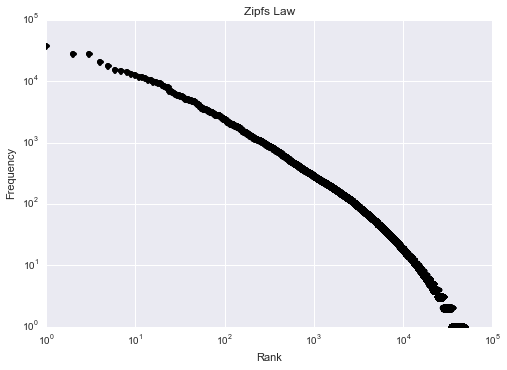

In [7]:
plt.title('Zipfs Law')
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.yscale('log')
plt.xscale('log')
plt.plot(data['rank'], data['frequency'], 'ko', label="Original Noised Data")
plt.plot(data['rank'], zipf(data['rank'],*popt), 'b-', label='fit')

In [10]:
zipf(data['rank'],*popt)[0:5]

0   -0.000531
1   -0.187020
2   -0.378601
3   -0.572174
4   -0.767055
Name: rank, dtype: float64